<a href="https://colab.research.google.com/github/thiagojm23/trabalhoFinalGrafos/blob/main/trabalhoFinalGrafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Número de nós: 28281
Número de arestas: 92752 


A) Representação visual do grafo:



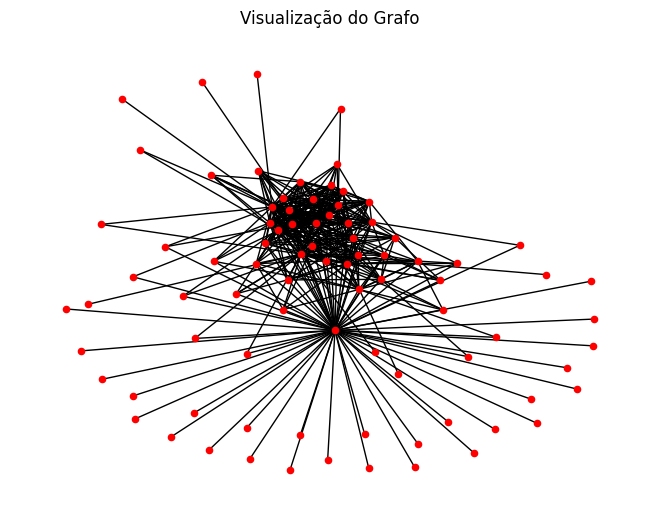



B) Grau médio do grafo: 6.56

Gráfico da distribuição do grau dos vértices desse grafo:



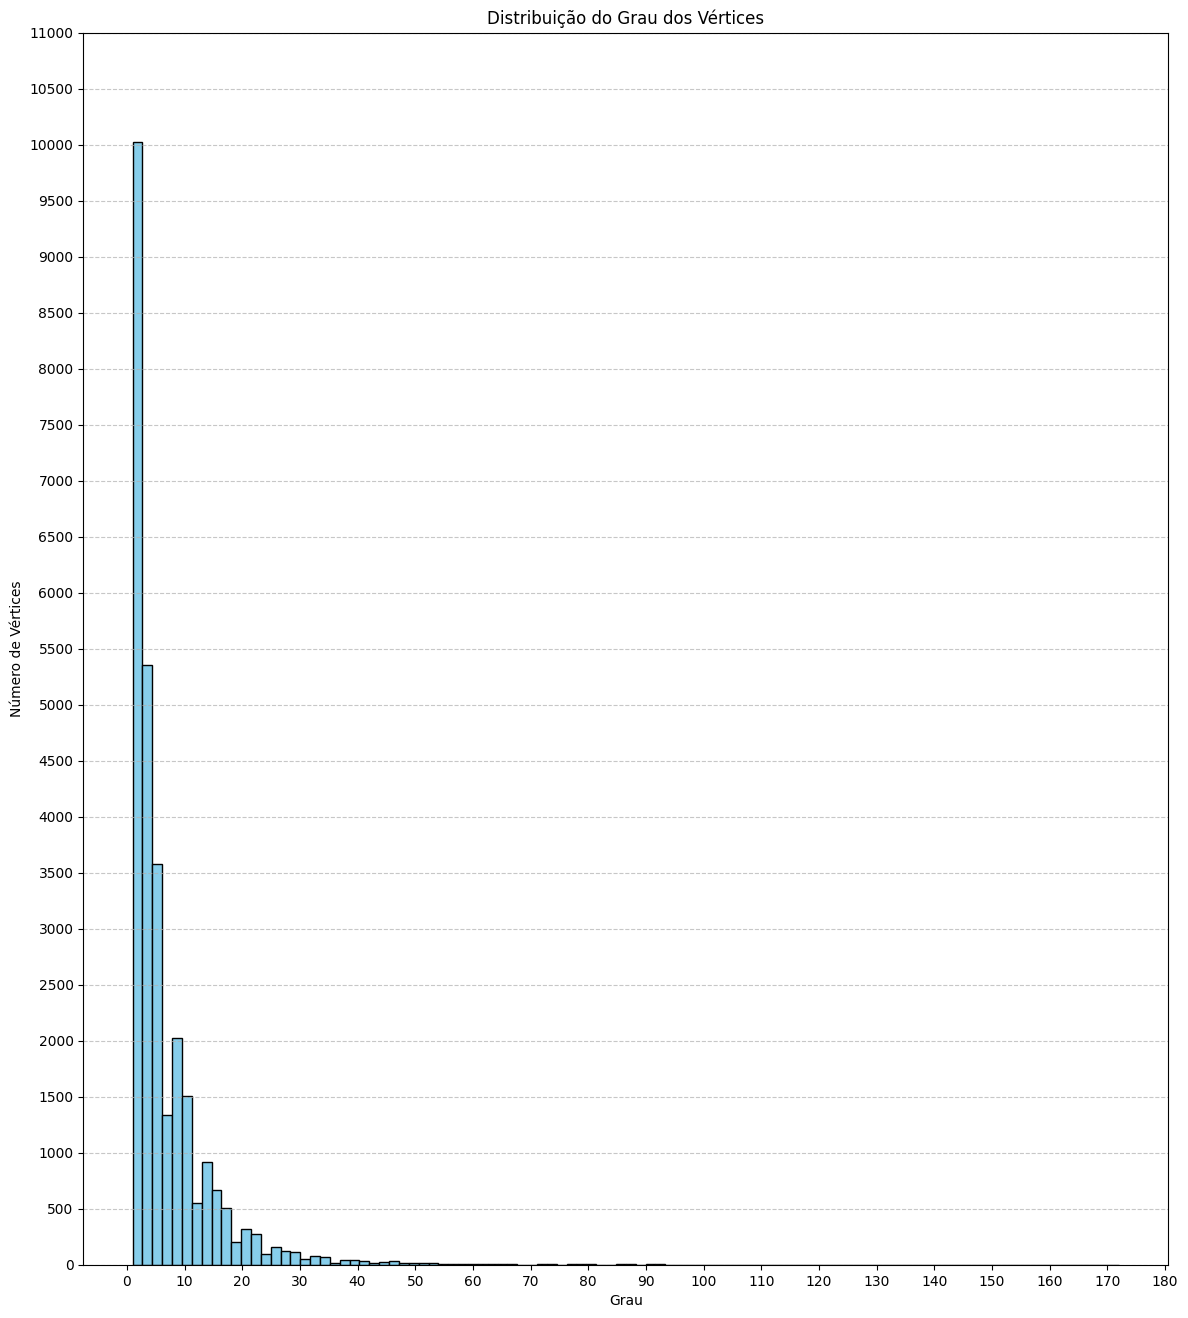



C) Número de componentes conectados: 1


D) Distribuição do tamanho dos componentes do grafo:

 O grafo possui apenas  1  componente conectado.


E) 

Distância média:  4.711719799430924 



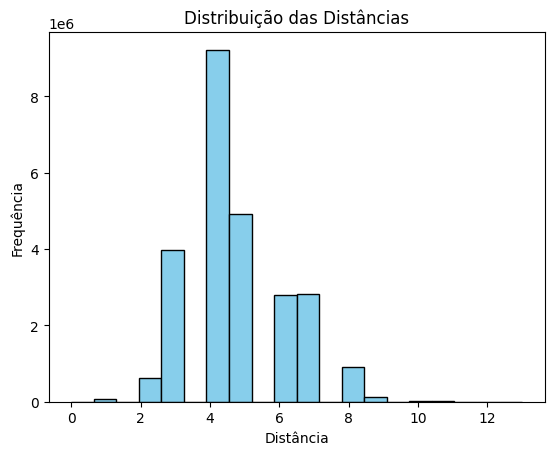

F) Número de pontes no grafo: 6470
Exemplo de pontes: [(3001, 27103), (1, 16675), (1, 22658), (1, 6133), (1, 20208)]


In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import community.community_louvain as community_louvain

#Carregar o CSV usando pandas, ignorando o cabeçalho
dados = pd.read_csv(r'/content/deezer_europe_edges.csv', skiprows=1, header=None, names=['node_1', 'node_2'])

#Criar o grafo a partir do DataFrame
G = nx.from_pandas_edgelist(dados, source='node_1', target='node_2')
print("Número de nós:", G.number_of_nodes())
print("Número de arestas:", G.number_of_edges(),"\n\n")

# A) Visualizar o grafo

# Detectar comunidades
partes = community_louvain.best_partition(G)

# Criar um grafo onde os nós representam as comunidades
grafoCondensado = nx.Graph()
for node, idComunidade in partes.items():
    grafoCondensado.add_node(idComunidade)
    for vizinho in G.neighbors(node):
        comunidadeVizinha = partes[vizinho]
        if idComunidade != comunidadeVizinha:
            grafoCondensado.add_edge(idComunidade, comunidadeVizinha)

# Visualização
nx.draw(grafoCondensado, node_color='red', node_size=20)

plt.title("Visualização do Grafo")
print("A) Representação visual do grafo:\n")
plt.show()

# B) Calcular o grau médio dos vertices

sequenciaGraus = [grau for _, grau in G.degree()]
grauMedio = sum(sequenciaGraus) / G.number_of_nodes()
print(f"\n\nB) Grau médio do grafo: {grauMedio:.2f}\n")

# Plotar a distribuição do grau (Gráfico)
plt.figure(figsize=(14, 16))
plt.hist(sequenciaGraus, bins=100, color='skyblue', edgecolor='black')
plt.title("Distribuição do Grau dos Vértices")
plt.xlabel("Grau")
plt.ylabel("Número de Vértices")

# Ajustar a escala do eixo y (de 500 em 500)
y_max = plt.gca().get_ylim()[1]  # Obtém o limite superior do eixo y
plt.yticks(range(0, int(y_max) + 500, 500))  # Define os ticks de 500 em 500

# Ajustar a escala do eixo x (de 10 em 10)
x_max = plt.gca().get_xlim()[1]  # Obtém o limite superior do eixo x
plt.xticks(range(0, int(x_max) + 10, 10))  # Define os ticks de 10 em 10

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adiciona uma grade para facilitar a leitura
print("Gráfico da distribuição do grau dos vértices desse grafo:\n")
plt.show()

# C) Calcular o número de componentes conectados
num_componentes = nx.number_connected_components(G)
print(f"\n\nC) Número de componentes conectados: {num_componentes}\n\n")

# D) Distribuição do tamanho dos componentes do grafo.
print("D) Distribuição do tamanho dos componentes do grafo:\n")
print(" O grafo possui apenas ", num_componentes ," componente conectado.\n\n")

# E) Calcular a distância média

# Passo 1: Filtrar vértices com grau maior que 10
vertices_filtrados = [n for n, grau in G.degree() if grau > 10]
# Criar um subgrafo contendo apenas os vértices filtrados
subgrafo_parcial = G.subgraph(vertices_filtrados)
# Passo 2: Encontrar as componentes conectadas
componentes = list(nx.connected_components(subgrafo_parcial))
# Selecionar a maior componente conectada
maior_componente = max(componentes, key=len)

# Criar o subgrafo conexo final
subgrafo_conexo = G.subgraph(maior_componente)

print("E) \n")
mediaDistancia = nx.average_shortest_path_length(subgrafo_conexo)
print("Distância média: " ,mediaDistancia , "\n")

#Distribuicao das distancias

distancias_frequencias = []
distancias = dict(nx.shortest_path_length(subgrafo_conexo))
for _, dists in distancias.items():
  distancias_frequencias.extend(dists.values())

# Criar histograma
plt.hist(distancias_frequencias, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribuição das Distâncias")
plt.xlabel("Distância")
plt.ylabel("Frequência")
plt.show()


# Encontrar arestas que são pontes no grafo
bridges = list(nx.bridges(G))
print(f"F) Número de pontes no grafo: {len(bridges)}")
print("Exemplo de pontes:", bridges[:5])  # Mostra algumas pontes


# Calcular a centralidade de carga
#edge_betweenness = nx.edge_betweenness_centrality(G)

#Ordenar as arestas pela centralidade (decrescente)
#sorted_edges = sorted(edge_betweenness.items(), key=lambda x: x[1], reverse=True)

# Testar se as 10 arestas principais são pontes
#potential_bridges = []
#for edge, centrality in sorted_edges[:10]:  # Ajuste o número de arestas a testar
#    if is_bridge(G, *edge):
#        potential_bridges.append(edge)

#print(f"Arestas com maior chance de serem pontes: {potential_bridges}")

Número de nós: 7624
Número de arestas: 27806 


A) Representação visual do grafo:



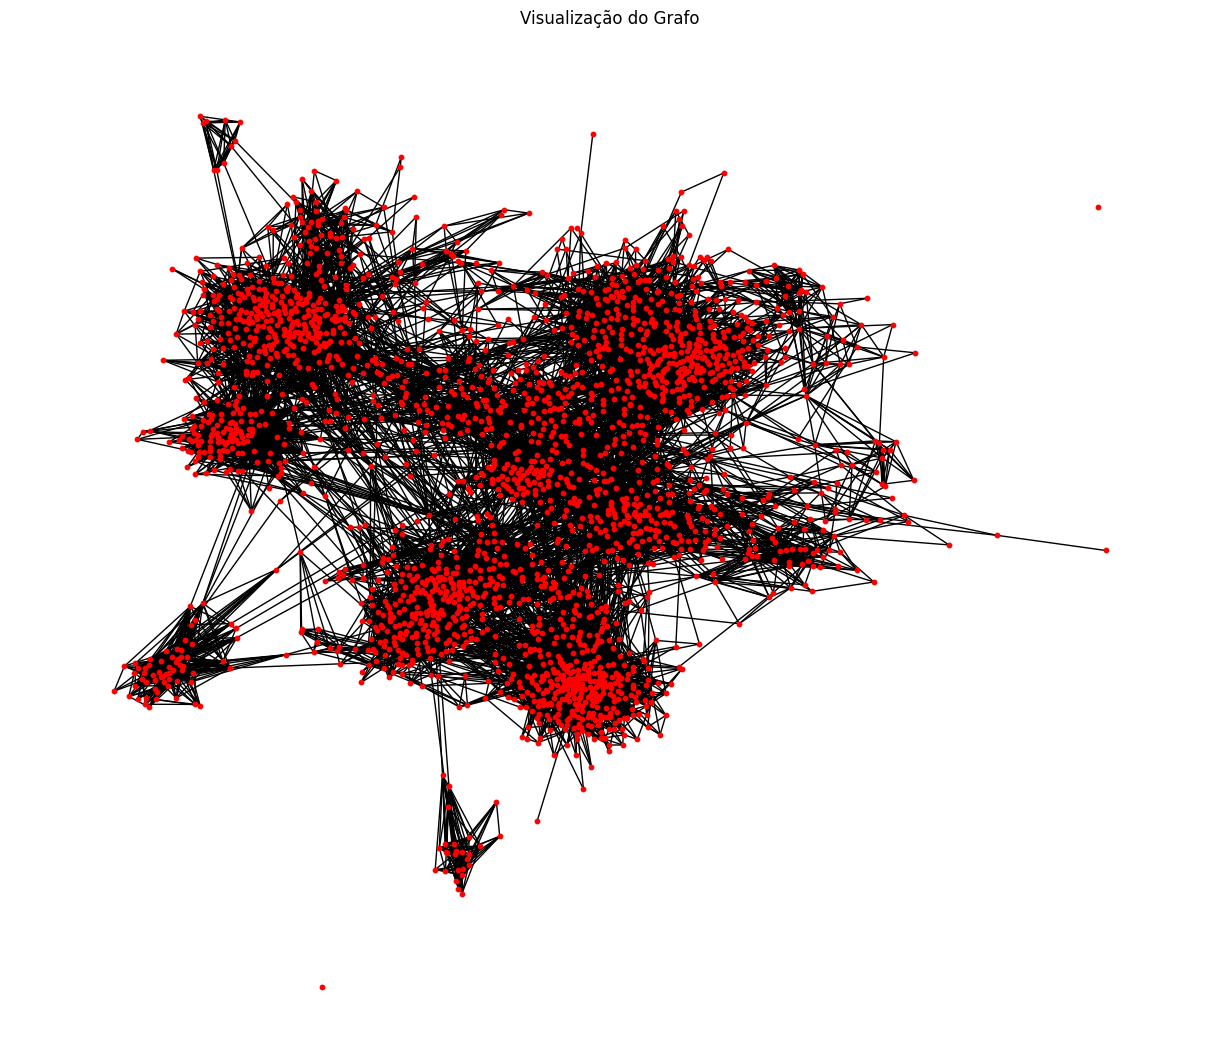



B) Grau médio do grafo: 7.29

Gráfico da distribuição do grau dos vértices desse grafo:



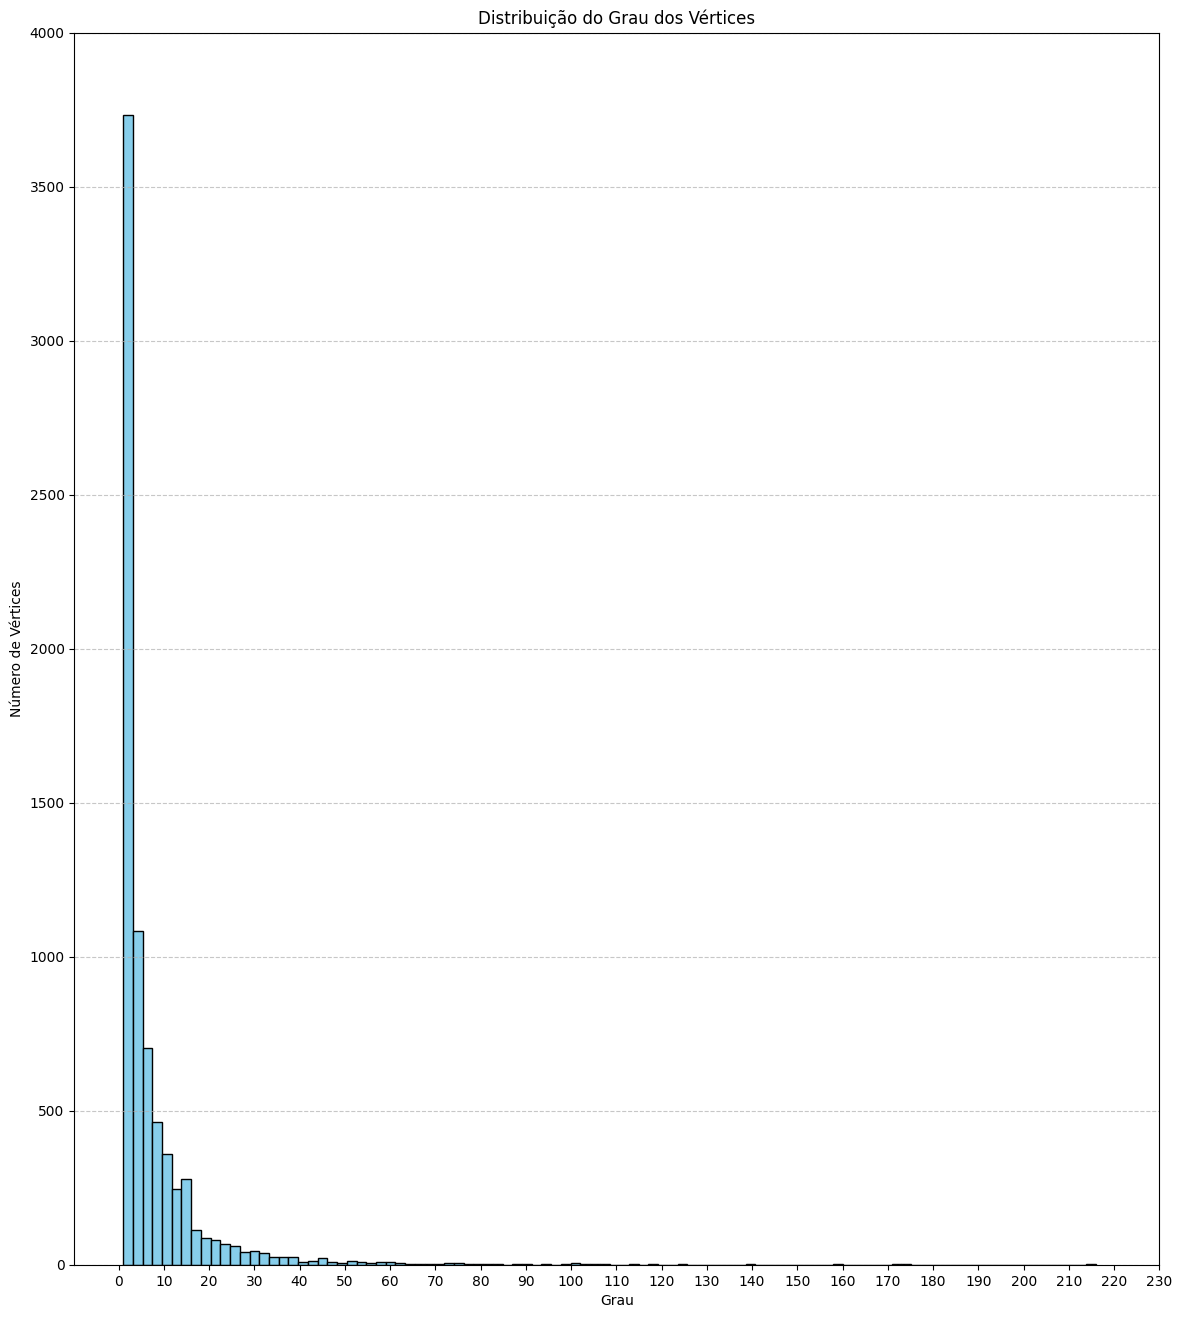



C) Número de componentes conectados: 1


D) Distribuição do tamanho dos componentes do grafo:

 O grafo possui apenas 1 componente conectado.


E) Distância média:  5.232237268915701 



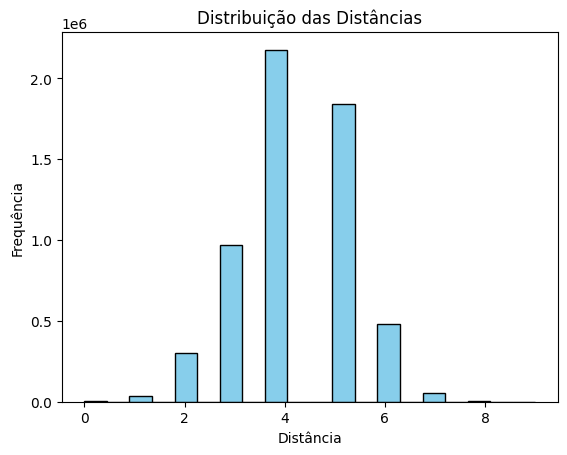



F) Número de pontes no grafo: 1929
Exemplo de pontes: [(0, 747), (1, 580), (4257, 180), (4257, 510), (4257, 1788)] 



In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

#Carregar o CSV usando pandas, ignorando o cabeçalho
dado = pd.read_csv(r'/content/lastfm_asia_edges.csv', skiprows=1, header=None, names=['node_1', 'node_2'])

#Criar o grafo a partir do DataFrame
G = nx.from_pandas_edgelist(dado, source='node_1', target='node_2')
print("Número de nós:", G.number_of_nodes())
print("Número de arestas:", G.number_of_edges(),"\n\n")

#Visualizar o grafo
vertices_grau_7_ou_mais = [v for v, grau in G.degree() if grau >= 7]
subgrafo = G.subgraph(vertices_grau_7_ou_mais)
posicao_spring = nx.spring_layout(subgrafo, k=0.065)

plt.figure(figsize=(12, 10))


nx.draw(subgrafo, pos=posicao_spring, node_size=10, node_color='red')
plt.title("Visualização do Grafo")
print("A) Representação visual do grafo:\n")
plt.show()


#Calcular o grau médio dos vertices

sequenciaGrau = [degree for _, degree in G.degree()]
grauMedio = sum(sequenciaGrau) / G.number_of_nodes()
print(f"\n\nB) Grau médio do grafo: {grauMedio:.2f}\n")

# Plotar a distribuição do grau (Gráfico)
plt.figure(figsize=(14, 16))
plt.hist(sequenciaGrau, bins=100, color='skyblue', edgecolor='black')
plt.title("Distribuição do Grau dos Vértices")
plt.xlabel("Grau")
plt.ylabel("Número de Vértices")

# Ajustar a escala do eixo y (de 500 em 500)
y_max = plt.gca().get_ylim()[1]  # Obtém o limite superior do eixo y
plt.yticks(range(0, int(y_max) + 500, 500))  # Define os ticks de 500 em 500

# Ajustar a escala do eixo x (de 10 em 10)
x_max = plt.gca().get_xlim()[1]  # Obtém o limite superior do eixo x
plt.xticks(range(0, int(x_max) + 10, 10))  # Define os ticks de 10 em 10

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adiciona uma grade para facilitar a leitura
print("Gráfico da distribuição do grau dos vértices desse grafo:\n")
plt.show()


# Calcular o número de componentes conectados
numeroComponentes = nx.number_connected_components(G)
print(f"\n\nC) Número de componentes conectados: {numeroComponentes}\n\n")


#Gere um gráfico com a distribuição do tamanho dos componentes do grafo.
print("D) Distribuição do tamanho dos componentes do grafo:\n")
print(f" O grafo possui apenas {numeroComponentes} componente conectado.\n\n")


# Calcular a distância média

# Passo 1: Filtrar vértices com grau maior que 6
vertices_filtrados = [n for n, grau in G.degree() if grau > 6]
# Criar um subgrafo contendo apenas os vértices filtrados
subgrafo_parcial = G.subgraph(vertices_filtrados)
# Passo 2: Encontrar as componentes conectadas
componentes = list(nx.connected_components(subgrafo_parcial))
# Selecionar a maior componente conectada
maior_componente = max(componentes, key=len)

# Criar o subgrafo conexo final
subgrafo_conexo = G.subgraph(maior_componente)

mediaDistancia = nx.average_shortest_path_length(G)
print("E) Distância média: ", mediaDistancia, "\n")

#Distribuicao das distancias

distancias_frequencias = []
distancias = dict(nx.shortest_path_length(subgrafo_conexo))
for _, dists in distancias.items():
  distancias_frequencias.extend(dists.values())

# Criar histograma
plt.hist(distancias_frequencias, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribuição das Distâncias")
plt.xlabel("Distância")
plt.ylabel("Frequência")
plt.show()
# Encontrar arestas que são pontes no grafo
bridges = list(nx.bridges(G))

print(f"\n\nF) Número de pontes no grafo: {len(bridges)}")
print("Exemplo de pontes:", bridges[:5], "\n")  # Mostra algumas pontes

# Calcular a centralidade de carga
#edge_betweenness = nx.edge_betweenness_centrality(G)

#Ordenar as arestas pela centralidade (decrescente)
#sorted_edges = sorted(edge_betweenness.items(), key=lambda x: x[1], reverse=True)

# Testar se as 10 arestas principais são pontes
#potential_bridges = []
#for edge, centrality in sorted_edges[:10]:  # Ajuste o número de arestas a testar
#    if is_bridge(G, *edge):
#        potential_bridges.append(edge)

#print(f"Arestas com maior chance de serem pontes: {potential_bridges}")




In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Carregar o arquivo .net sem cabeçalho
caminhoArq = '/content/scientometrics.net'
dados = pd.read_csv(caminhoArq, sep=' ', header=None, names=['source', 'target'])

# Criar o grafo direcionado a partir do DataFrame

N = 1656  # Número total de vértices fornecido

grafo = nx.from_pandas_edgelist(dados, source='source', target='target', create_using=nx.DiGraph)
grafo.add_nodes_from(range(1, N+1 )) # Adiciona vértices de 1 até 1656

print("Número de nós:", grafo.number_of_nodes())
print("Número de arestas:", grafo.number_of_edges(),"\n\n")


# Cálculo da densidade
densidade = (2 * grafo.number_of_edges()) / (grafo.number_of_nodes() * (grafo.number_of_nodes() - 1))
print("\n\n2.A) Densidade do grafo:\n")
print(f"A densidade do grafo é aproximadamente {densidade:.8f}.\n\n")

# Calcular o grau médio de entrada e saída
print("B) Grau médio de entrada e saída dos vértices:\n")

grau_entrada_medio = sum(dict(grafo.in_degree()).values()) / grafo.number_of_nodes()
grau_saida_medio = sum(dict(grafo.out_degree()).values()) / grafo.number_of_nodes()

print("Grau médio de entrada:", grau_entrada_medio)
print("Grau médio de saída:", grau_saida_medio)

# Calcular o número de componentes conexos

print("\n\nC) Componentes conexos do grafo:\n")
componetes_forte = nx.number_strongly_connected_components(grafo)  # Componentes fortemente conexos
componetes_fraco = nx.number_weakly_connected_components(grafo)    # Componentes fracamente conexos

print("Componentes fortemente conexas:",componetes_forte)
print("Componentes fracamente conexas:",componetes_fraco)

# Quantidade de ciclos
ciclos = list(nx.simple_cycles(grafo))
print("D) Quantidade de ciclos: ",ciclos)

# Calcular caminhos mais curtos
distancias = []
for noAtual in grafo.nodes:
    lengths = nx.single_source_shortest_path_length(grafo, noAtual)  # Busca em largura
    distancias.extend(lengths.values())

# Calcular a média dos caminhos mais curtos
if distancias:
    caminhosMaisCurtos = sum(distancias) / len(distancias)
    print(f"\nMédia do comprimento dos caminhos mais curtos (pares conectados): {caminhosMaisCurtos:.4f}\n")
else:
    print("Nenhum caminho válido encontrado no grafo.\n\n")

# Calcular graus de entrada e saída
grauEntrada = dict(grafo.in_degree())   # Grau de entrada
grauSaida = dict(grafo.out_degree()) # Grau de saída

# Somar graus de entrada e saída para obter o grau total
total_graus = {node: grauEntrada[node] + grauSaida[node] for node in grafo.nodes}

# Exibir os vértices com maior grau total
print("E) Centralidade de Grau Total (Entrada + Saída):")
print("Vértices mais importantes:")
for node, grau in sorted(total_graus.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"Vértice {node}: Grau Total = {grau}")


#Alunos: Augusto Klug de Abreu, Thiago Jung Morais, Lucas Elias Parisotto


Número de nós: 1656
Número de arestas: 4123 




2.A) Densidade do grafo:

A densidade do grafo é aproximadamente 0.00300874.


B) Grau médio de entrada e saída dos vértices:

Grau médio de entrada: 2.489734299516908
Grau médio de saída: 2.489734299516908


C) Componentes conexos do grafo:

Componentes fortemente conexas: 1654
Componentes fracamente conexas: 301
D) Quantidade de ciclos:  [[1248, 1247], [976, 975]]

Média do comprimento dos caminhos mais curtos (pares conectados): 3.8365

E) Centralidade de Grau Total (Entrada + Saída):
Vértices mais importantes:
Vértice 1480: Grau Total = 158
Vértice 412: Grau Total = 76
Vértice 218: Grau Total = 61
Vértice 308: Grau Total = 43
Vértice 466: Grau Total = 39
Vértice 177: Grau Total = 35
Vértice 836: Grau Total = 34
Vértice 329: Grau Total = 33
Vértice 192: Grau Total = 31
Vértice 6: Grau Total = 29
